In [1]:
%matplotlib widget

In [2]:
from csd.global_result_manager import GlobalResultManager
import matplotlib.pyplot as plt2
from matplotlib.widgets import CheckButtons


In [3]:
lines = GlobalResultManager().plot_success_probabilities(save_plot=False, show_plot=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
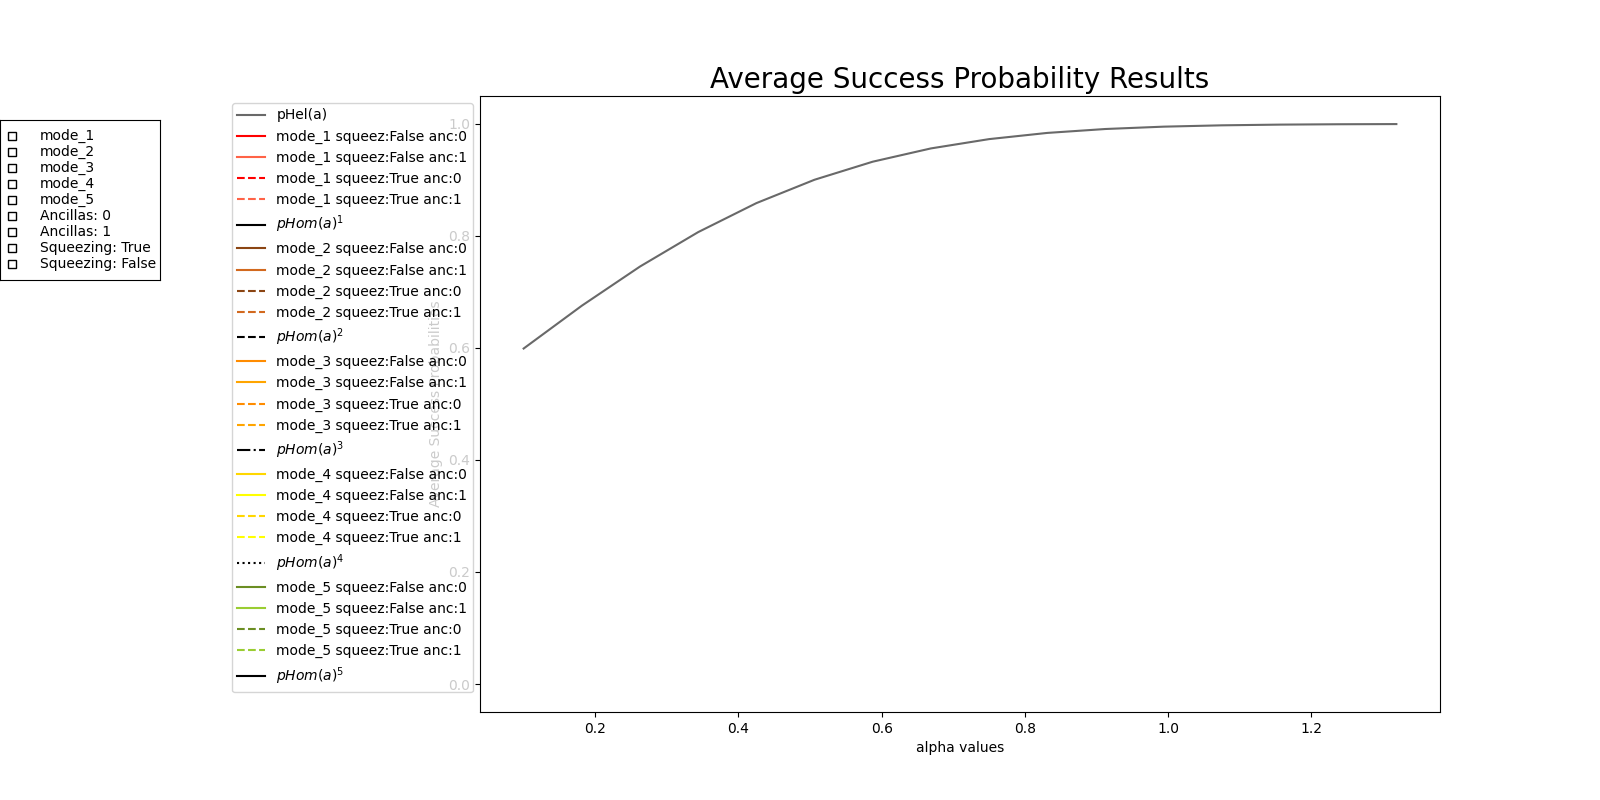

In [93]:
fig, axes = plt2.subplots(figsize=[16, 8])
fig.patch.set_facecolor('grey')
fig.patch.set_alpha(0.0)
axes.patch.set_facecolor('grey')
axes.patch.set_alpha(0.0)
plt2.title("Average Success Probability Results", fontsize=20)
plt2.xlabel('alpha values')
plt2.ylabel('Average Success Probabilities')

new_lines = lines.copy()
plt_lines = []
for line in new_lines:
    plt_line, = axes.plot(line[0], line[1], label=line[2], color=line[3], linestyle=line[4])
    plt_lines.append(plt_line)

plt2.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)

plt2.subplots_adjust(left=0.3)
rax = plt2.axes([0.0, 0.65, 0.1, 0.2])
rax.set_facecolor('grey')
rax.patch.set_alpha(0.0)
line_labels = [str(line.get_label()) for line in plt_lines]
labels = ["mode_1", "mode_2", "mode_3", "mode_4", "mode_5", "Ancillas: 0", "Ancillas: 1", "Squeezing: True", "Squeezing: False"]
labels_activated = [False, False, False, False, False, False, False, False, False]
# visibility = [line.get_visible() for line in plt_lines]
lines_visibility = [line.set_visible(False) for line in plt_lines if 'mode' in str(line.get_label()) or 'pHom' in str(line.get_label())]
check = CheckButtons(rax, labels, labels_activated)

def func(label: str) -> None:
    # index = labels.index(label)
    label_checks = check.get_status()
    ancilla_0 = label_checks[-4]
    ancilla_1 = label_checks[-3]
    squeezing_true = label_checks[-2]
    squeezing_false = label_checks[-1]
    if 'mode' in label:
        for line in plt_lines:
            line_label = str(line.get_label())
            if squeezing_true and label in line_label and 'squeez:True' in line_label and ancilla_0 and 'anc:0' in line_label:
                line.set_visible(not line.get_visible())
            if squeezing_true and label in line_label and 'squeez:True' in line_label and ancilla_1 and 'anc:1' in line_label:
                line.set_visible(not line.get_visible())
            if squeezing_false and label in line_label and 'squeez:False' in line_label and ancilla_0 and 'anc:0' in line_label:
                line.set_visible(not line.get_visible())
            if squeezing_false and label in line_label and 'squeez:False' in line_label and ancilla_1 and 'anc:1' in line_label:
                line.set_visible(not line.get_visible())
            if '_1' in label and 'Hom' in line_label and '1' in line_label:
                line.set_visible(not line.get_visible())
            if '_2' in label and 'Hom' in line_label and '2' in line_label:
                line.set_visible(not line.get_visible())
            if '_3' in label and 'Hom' in line_label and '3' in line_label:
                line.set_visible(not line.get_visible())
            if '_4' in label and 'Hom' in line_label and '4' in line_label:
                line.set_visible(not line.get_visible())
            if '_5' in label and 'Hom' in line_label and '5' in line_label:
                line.set_visible(not line.get_visible())
    if 'Squeezing' in label:
        squeez_text = 'squeez:True' if 'Squeezing: True' in label else 'squeez:False'
        for index, label_check in enumerate(label_checks):
            if label_check and index<5:
                mode_label = labels[index]
                for line in plt_lines:
                    line_label = str(line.get_label())
                    if mode_label in line_label and squeez_text in line_label and ancilla_0 and 'anc:0' in line_label:
                        line.set_visible(not line.get_visible())
                    if mode_label in line_label and squeez_text in line_label and ancilla_1 and 'anc:1' in line_label:
                        line.set_visible(not line.get_visible())
    if 'Ancillas' in label:
        ancilla_text = 'anc:0' if 'Ancillas: 0' in label else 'anc:1'
        for index, label_check in enumerate(label_checks):
            if label_check and index<5:
                mode_label = labels[index]
                for line in plt_lines:
                    line_label = str(line.get_label())
                    if squeezing_false and mode_label in line_label and ancilla_text in line_label and 'squeez:False' in line_label:
                        line.set_visible(not line.get_visible())
                    if squeezing_true and mode_label in line_label and ancilla_text in line_label and 'squeez:True' in line_label:
                        line.set_visible(not line.get_visible())
        
                
    # plt_lines[index].set_visible(not plt_lines[index].get_visible())
    plt2.draw()

check.on_clicked(func)
plt2.show()


In [89]:
plt2.close('all')

In [77]:
status = check.get_status()

In [78]:
len(status)

7

In [79]:
status

[True, False, False, False, False, True, True]

In [81]:
status[-2]

True